1. Використовуючи датасет з файлу **Position_Salaries.csv**, побудуйте модель поліноміальної регресії

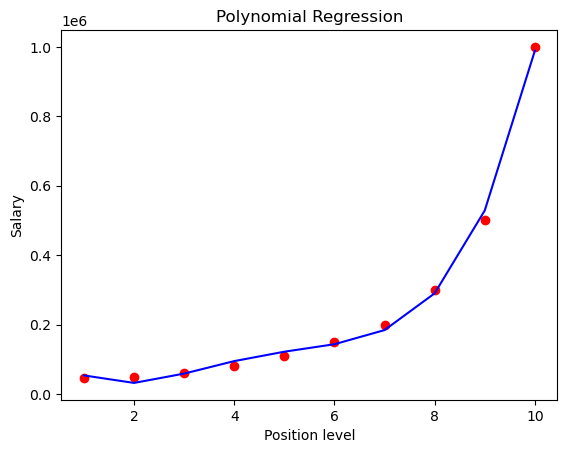

R-squared 0.9973922891706614


In [12]:
import pandas as pd

# Імпортуємо датасет з файлу Position_Salaries.csv
dataset = pd.read_csv('Position_Salaries.csv')

# Розділяємо датасет на ознаки (X) та цільову змінну (y)
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Імпортуємо клас PolynomialFeatures з бібліотеки sklearn.preprocessing,
# щоб згенерувати поліноміальні ознаки
from sklearn.preprocessing import PolynomialFeatures

# Встановлюємо степінь поліноміальної регресії
poly_reg = PolynomialFeatures(degree=4)

# Трансформуємо ознаки X у поліноміальні ознаки
X_poly = poly_reg.fit_transform(X)

# Імпортуємо клас LinearRegression з бібліотеки sklearn.linear_model,
# щоб побудувати модель лінійної регресії
from sklearn.linear_model import LinearRegression

# Створюємо об'єкт класу LinearRegression та навчаємо модель на даних X_poly та y
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Візуалізуємо результати за допомогою бібліотеки matplotlib.pyplot
import matplotlib.pyplot as plt

# Візуалізуємо дійсні точки даних
plt.scatter(X, y, color='red')

# Візуалізуємо поліноміальну регресію
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='blue')

# Додаємо назву графіку та мітки для осей
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')

# Відображаємо графік
plt.show()

# Відображаємо значення коефіцієнту детермінації (R-squared) за допомогою методу score моделі
print('R-squared', lin_reg.score(X_poly, y))


Робим висновок, що поліноміальна регресія підходить для моделювання залежності зарплати від рівня позиції працівника в даному датасеті.

Графіки візуалізують поліноміальну залежність між змінними та демонструють відповідність моделі даним.

Коефіцієнт детермінації (R-squared) також підтверджує відповідність моделі даним.

Значить дану модель поліноміальної регресії можна використовувати для передбачення зарплати працівника в залежності від його позиції на роботі.

2. Використовуючи датасет з файлу communities.csv, виконайте нормалізацію даних

In [25]:
# Імпортуємо необхідні модулі
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Завантажуємо набір даних та замінюємо символ '?' на 0
df = pd.read_csv('communities.csv')
df_communities = df.replace('?', 0)

# Видаляємо стовпець 'Lakewoodcity' та перейменовуємо стовпці з '?'
df_communities = df_communities.drop('Lakewoodcity', axis='columns')
df_communities = df_communities.rename(columns = {"?":"1.2", "?.1":"1.1"})

# Розбиваємо набір даних на масиви ознак (X) та цільової змінної (y)
X_array = np.array(df_communities.iloc[:, :-1])
y_array = np.array(df_communities.iloc[:, -1])

# Розбиваємо набір даних на тренувальні та тестові масиви
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.3, random_state=42)

# Навчаємо модель лінійної регресії та оцінюємо її продуктивність на тренувальному та тестовому наборах
lr = LinearRegression().fit(X_train, y_train)
print(f"Linear_Regression-Оцінка для тренувальної вибірки: {lr.score(X_train, y_train):.2f}")
print(f"Linear_Regression-Оцінка для тестової вибірки: {lr.score(X_test, y_test):.2f}")

# Навчаємо модель Lasso регресії та оцінюємо її продуктивність на тренувальному та тестовому наборах
lasso = Lasso(alpha=0.0001).fit(X_train, y_train)
print(f"\nLasso регресія-Оцінка для тренувальної вибірки: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso регресія-Оцінка для тестової вибірки: {lasso.score(X_test, y_test):.2f}")

# Навчаємо модель Ridge регресії на тренувальних даних
ridge = Ridge(alpha=0.6).fit(X_train, y_train)

# Оцінюємо точність моделі Ridge регресії на тренувальних та тестових даних
print(f"\nRidge Regression - Точність на тренувальних даних: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression - Точність на тестових даних: {ridge.score(X_test, y_test):.2f}")


Linear_Regression-Оцінка для тренувальної вибірки: 0.71
Linear_Regression-Оцінка для тестової вибірки: 0.65

Lasso регресія-Оцінка для тренувальної вибірки: 0.70
Lasso регресія-Оцінка для тестової вибірки: 0.67

Ridge Regression - Точність на тренувальних даних: 0.71
Ridge Regression - Точність на тестових даних: 0.67


У цій програмі порівняно ефективність трьох різних моделей регресії: лінійної, Lasso та Ridge.

Результати показали, що модель Ridge регресії показала найкращі результати на тренувальних та тестових даних.

Це означає, що використання моделі Ridge може допомогти в прогнозуванні цільової змінної в даному датасеті.